In [8]:

import pickle
import pandas as pd
from measurement import read_mgf, Scan

from protein import trypsin

from pyteomics.mass import calculate_mass

from common import LYS, BSA, OVA, LIP


In [ ]:
FRAGMENT_FILE = "../out/fragment_matches/OVA_AT_segments=3_breaks=2_error=15ppm.pickle"

In [373]:
fragments = []
with open(FRAGMENT_FILE, "rb") as f:
    while True:
        fragments.append(pickle.load(f))


EOFError: Ran out of input

In [375]:
df = pd.DataFrame(fragments)
df

,measurement,precursor,variants,multipeptide,bonds,match,fragment_id,fragment_mz,intensity,charge,total_intensity,score
0,<measurement.PeptideMeasurement object at 0x49...,{'measurement': <measurement.PeptideMeasuremen...,1,VASMASEKMK,(),"{'seq': 'K', 'ranges': [(225, 226)], 'mass': 1...",8,129.102437,178681.046875,1,4.739896e+06,0.037697
1,<measurement.PeptideMeasurement object at 0x4a...,{'measurement': <measurement.PeptideMeasuremen...,1,VASMASEKMK,(),"{'seq': 'K', 'ranges': [(227, 228)], 'mass': 1...",8,129.102437,178681.046875,1,4.739896e+06,0.037697
2,<measurement.PeptideMeasurement object at 0x49...,{'measurement': <measurement.PeptideMeasuremen...,1,VASMASEKMK,(),"{'seq': 'K', 'ranges': [(227, 228)], 'mass': 1...",9,130.086993,55991.753906,1,4.739896e+06,0.011813
3,<measurement.PeptideMeasurement object at 0x49...,{'measurement': <measurement.PeptideMeasuremen...,1,VASMASEKMK,(),"{'seq': 'AS', 'ranges': [(219, 221)], 'mass': ...",13,141.065694,9986.906250,1,4.739896e+06,0.002107
4,<measurement.PeptideMeasurement object at 0x49...,{'measurement': <measurement.PeptideMeasuremen...,1,VASMASEKMK,(),"{'seq': 'AS', 'ranges': [(222, 224)], 'mass': ...",13,141.065694,9986.906250,1,4.739896e+06,0.002107
...,...,...,...,...,...,...,...,...,...,...,...,...
2876,<measurement.PeptideMeasurement object at 0x4a...,{'measurement': <measurement.PeptideMeasuremen...,1,DEDTQAMPFRVTEQESKPVQMMYQIGLFRVASMASEK,(),"{'seq': 'QESKPVQMMYQI', 'ranges': [(202, 214)]...",23,482.566593,2882.504395,3,7.291893e+04,0.039530
2877,<measurement.PeptideMeasurement object at 0x4a...,{'measurement': <measurement.PeptideMeasuremen...,1,DEDTQAMPFRVTEQESKPVQMMYQIGLFRVASMASEK,(),"{'seq': 'EDTQAM', 'ranges': [(190, 196)], 'mas...",16,220.087029,2136.551758,3,7.015100e+04,0.030456
2878,<measurement.PeptideMeasurement object at 0x4a...,{'measurement': <measurement.PeptideMeasuremen...,1,DEDTQAMPFRVTEQESKPVQMMYQIGLFRVASMASEK,(),"{'seq': 'FRVAS', 'ranges': [(216, 221)], 'mass...",21,543.311687,2796.637695,1,7.015100e+04,0.039866
2879,<measurement.PeptideMeasurement object at 0x4a...,{'measurement': <measurement.PeptideMeasuremen...,1,DEDTQAMPFRVTEQESKPVQMMYQIGLFRVASMASEK,(),"{'seq': 'RVTEQESKPVQMMYQIGLFRV', 'ranges': [(1...",27,1252.143413,2924.811523,2,7.015100e+04,0.041693


In [20]:
import matplotlib.pyplot as plt


def histo(data):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(
        x=data,
        bins="auto",
        color="#0504aa",
        alpha=0.7,
        rwidth=0.85,
    )
    plt.grid(axis="y", alpha=0.75)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title("My Very Own Histogram")
    plt.text(23, 45, r"$\mu=15, b=3$")
    plt.xticks(rotation=90)
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    return plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


flattened = [(b[0] + 1, b[1] + 1) for m in df.bonds for b in m]
histo([str(b) for b in sorted(flattened)])

In [177]:
# From old fragment analysis
# ((6, 127), 13.346290121050531)
# ((30, 115), 7.283808779510653)
# ((94, 115), 4.902732231508441)
# ((30, 127), 4.175014297421382)
# ((6, 76), 3.5228414463338105)
# ((6, 115), 3.4146538279373413)
# ((80, 115), 2.652638582827121)
# ((76, 80), 1.8027670677845962)
# ((64, 127), 1.6640611786956967)
# ((94, 127), 1.6384830750559505)
# ((80, 127), 1.6018448515043544)
# ((76, 94), 1.5866929809330261)
# ((6, 64), 1.4861990294897955)
# ((64, 76), 1.171054578671526)
# ((6, 94), 1.1382788403829496)
# ((30, 76), 1.0597983564585203)
# ((6, 80), 1.0528272625199064)
# ((64, 115), 0.9401018143378905)
# ((115, 127), 0.9266341801551622)
# ((76, 127), 0.5575763428777898)
# ((30, 94), 0.48211151877450525)
# ((6, 30), 0.41906206956130065)
# ((76, 115), 0.3512598674841227)
# ((64, 94), 0.23690502620184029)
# ((30, 64), 0.23429644150417078)
# ((64, 80), 0.1591891546235903)
# ((80, 94), 0.031476791393323385)


[6276]

In [390]:
d = pd.DataFrame()

d["scan"] = [m.scan for m in df["measurement"]]
d["precursor_seq"] = [str(m) for m in df["multipeptide"]]
d["precursor_charge"] = [m.charge for m in df["measurement"]]
d["variant_bonds"] = ["+".join(str(r) for r in b) for b in df["bonds"]]
d["charge"] = df["charge"]
d["sequence"] = [m["seq"] for m in df["match"]]
d["matched_ranges"] = ["+".join(str(r) for r in m["ranges"]) for m in df["match"]]
d["mass"] = [m["mass"] for m in df["match"]]
d["connected_bonds"] = [
    "+".join(str(r) for r in m["connected_bonds"]) for m in df["match"]
]
d["disconnected_cys"] = [
    "+".join(str(c) for c in m["disconnected_cys"]) for m in df["match"]
]
d["interesting_disconnected_cys"] = [
    "+".join(str(c) for c in m["interesting_disconnected_cys"]) for m in df["match"]
]
d["alkylated_cys"] = [
    "+".join(
        str(c)
        for c in cysteines
        if c not in cys_in_bonds and any(b <= c < e for b, e in m["ranges"])
    )
    for m in df["match"]
]

d["match_error_ppm"] = [m["error"] for m in df["match"]]
d["target_mz"] = df["fragment_mz"]
df["fragment_id"] = df["fragment_id"]
d["intensity"] = df["intensity"]
d["total_intensity"] = df["total_intensity"]
d["variant_counts"] = [variant_counts.loc[m.scan, "variant"] for m in df["measurement"]]
d["mod_count"] = [len(m["mods"]) for m in df["match"]]
d["mods"] = ["+".join(mod.description for mod in m["mods"]) for m in df["match"]]
d["variant_probability"] = precursor_probabilities

d

,scan,precursor_seq,precursor_charge,variant_bonds,charge,sequence,matched_ranges,mass,connected_bonds,disconnected_cys,interesting_disconnected_cys,alkylated_cys,match_error_ppm,target_mz,intensity,total_intensity,variant_counts,mod_count,mods,variant_probability
0,863,VASMASEKMK,3,,1,K,"(225, 226)",128.094963,,,,,2.739734,129.102437,178681.046875,4.739896e+06,1,0,,0.001350
1,863,VASMASEKMK,3,,1,K,"(227, 228)",128.094963,,,,,2.739734,129.102437,178681.046875,4.739896e+06,1,1,–H2O neutral loss,0.001350
2,863,VASMASEKMK,3,,1,K,"(227, 228)",129.078979,,,,,1.467871,130.086993,55991.753906,4.739896e+06,1,1,–NH3 neutral loss,0.001350
3,863,VASMASEKMK,3,,1,AS,"(219, 221)",140.058578,,,,,5.058150,141.065694,9986.906250,4.739896e+06,1,1,–H2O neutral loss,0.001350
4,863,VASMASEKMK,3,,1,AS,"(222, 224)",140.058578,,,,,5.058150,141.065694,9986.906250,4.739896e+06,1,1,–H2O neutral loss,0.001350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,11656,DEDTQAMPFRVTEQESKPVQMMYQIGLFRVASMASEK,3,,3,QESKPVQMMYQI,"(202, 214)",1444.684292,,,,,5.528773,482.566593,2882.504395,7.291893e+04,1,1,–H2O neutral loss,0.000146
2877,11916,DEDTQAMPFRVTEQESKPVQMMYQIGLFRVASMASEK,4,,3,EDTQAM,"(190, 196)",657.242826,,,,,7.932069,220.087029,2136.551758,7.015100e+04,1,1,–H2O neutral loss,0.000146
2878,11916,DEDTQAMPFRVTEQESKPVQMMYQIGLFRVASMASEK,4,,1,FRVAS,"(216, 221)",542.296516,,,,,13.545566,543.311687,2796.637695,7.015100e+04,1,1,–H2O neutral loss,0.000146
2879,11916,DEDTQAMPFRVTEQESKPVQMMYQIGLFRVASMASEK,4,,2,RVTEQESKPVQMMYQIGLFRV,"(198, 219)",2502.287555,,,,,6.545827,1252.143413,2924.811523,7.015100e+04,1,1,–H2O neutral loss,0.000146


In [391]:
d.to_csv("../out/csv/fragment_matches_OVA.csv", index_label="id", sep=";")

In [14]:
precursor_matches = []
with open(
    "../out/precursor_matches/LYS_AT_segments=6_error=15ppm_testing.pickle", "rb"
) as f:
    while True:
        precursor_matches.append(pickle.load(f))

EOFError: Ran out of input

In [ ]:
precursor_matches_df = pd.DataFrame(precursor_matches)
precursor_matches_df["scan_nth"] = [
    scan.nth_in_order for scan in precursor_matches_df["scan"]
]
precursor_matches_df = precursor_matches_df[
    [
        "scan_id",
        "scan_nth",
        "prec_mz",
        "prec_sequence",
        "prec_mass",
        "prec_error",
        "prec_mods",
        "prec_cys_bond_count",
        "prec_mc",
    ]
]

precursor_matches_df

In [349]:
from pymzid.read_mzid import Mzid
from fragments import compute_error

mgf_id = Mzid("../data/mgf/190318_LYS_AT_50x_05.mzid")
mgf_id.read_psm()
msgf_matches_df = mgf_id.psm_df

msgf_matches_df.head(30)

Reading peptide spectrum matches: 100%|█████████▉| 1217/1218 [00:00<00:00, 42781.09it/s]


,sir_id,spectrum_id,pe_id,sii_id,z,mz,calc_mz,pep_id,pass_threshold,rank,MS-GF:RawScore,MS-GF:DeNovoScore,MS-GF:SpecEValue,MS-GF:EValue
0,SIR_5123,index=5122,PepEv_22_GYSLGNWVCAAKFESNFNTQATNR_22,SII_5123_1,3,912.427001953125,912.435791015625,Pep_GYSLGNWVCAAKFESNFNTQATNR,true,1,175,176,1.9008859E-30,2.4521429E-28
1,SIR_4648,index=4647,PepEv_22_GYSLGNWVCAAKFESNFNTQATNR_22,SII_4648_1,3,912.42822265625,912.435791015625,Pep_GYSLGNWVCAAKFESNFNTQATNR,true,1,167,169,4.8748996E-30,6.2886206E-28
2,SIR_4370,index=4369,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_4370_1,3,1055.162109375,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,159,174,2.1087976E-27,2.7203489E-25
3,SIR_4503,index=4502,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_4503_1,3,1055.162109375,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,155,165,5.184633E-27,6.6881767E-25
4,SIR_4433,index=4432,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_4433_1,3,1055.498046875,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,153,171,2.9292433E-26,3.778724E-24
5,SIR_4781,index=4780,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_4781_1,3,1055.1624755859375,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,115,141,1.0629297E-25,1.3711793E-23
6,SIR_12433,index=12432,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_12433_1,3,1055.1634521484375,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,130,152,1.7940855E-25,2.3143704E-23
7,SIR_5083,index=5082,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_5083_1,3,1055.1627197265625,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,128,147,7.9793734E-25,1.02933916E-22
8,SIR_10326,index=10325,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_10326_1,3,1055.16357421875,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,118,134,9.035872E-25,1.1656276E-22
9,SIR_5839,index=5838,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_5839_1,3,1055.163330078125,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,93,111,1.8105348E-24,2.33559E-22


In [ ]:
msgf_matches_df["spectrum_id"] = [
    int(s.removeprefix("index=")) for s in msgf_matches_df["spectrum_id"]
]
msgf_matches_df["pep_id"] = [s.removeprefix("Pep_") for s in msgf_matches_df["pep_id"]]
msgf_matches_df["their_error_ppm"] = [
    compute_error(float(reference), float(measured))
    for reference, measured in zip(msgf_matches_df["calc_mz"], msgf_matches_df["mz"])
]

msgf_matches_df = msgf_matches_df[
    ["spectrum_id", "calc_mz", "pep_id", "their_error_ppm"]
]
msgf_matches_df = msgf_matches_df.rename(
    columns={"pep_id": "their_sequence", "calc_mz": "their_mz"}
)
msgf_matches_df = msgf_matches_df.set_index("spectrum_id")
msgf_matches_df

In [345]:
precursor_matches_df.join(msgf_matches_df, how="outer").to_csv(
    "../out/my_vs_their_matches_rat.csv"
)


In [378]:
protein = OVA
cysteines = [i for i in range(len(protein)) if protein[i] == "C"]
cysteines

[10, 29, 72, 119, 366, 381]

In [379]:
from collections import Counter

segment_counter = Counter()
for m in precursor_matches:
    for b, e in m["ranges"]:
        for s in range(b, e):
            segment_counter[s] += 1
segment_counter

Counter({19: 48,
         20: 21,
         3: 27,
         4: 22,
         5: 19,
         9: 18,
         22: 64,
         29: 14,
         6: 11,
         24: 38,
         25: 36,
         23: 44,
         16: 25,
         17: 48,
         26: 31,
         32: 55,
         33: 19,
         15: 10,
         18: 41,
         31: 34,
         12: 19,
         11: 16,
         2: 25,
         10: 30,
         13: 7,
         14: 9,
         1: 36,
         8: 5,
         0: 37,
         30: 6,
         7: 9,
         27: 28,
         28: 9,
         21: 3})

In [380]:
segments = list(segment_counter.keys())
total = sum(segment_counter.values())
segment_probabilities = []
for s in range(min(segments), max(segments) + 1):
    segment_probabilities.append(segment_counter[s] / total)
segment_probabilities

[0.04282407407407408,
 0.041666666666666664,
 0.028935185185185185,
 0.03125,
 0.02546296296296296,
 0.02199074074074074,
 0.01273148148148148,
 0.010416666666666666,
 0.005787037037037037,
 0.020833333333333332,
 0.034722222222222224,
 0.018518518518518517,
 0.02199074074074074,
 0.008101851851851851,
 0.010416666666666666,
 0.011574074074074073,
 0.028935185185185185,
 0.05555555555555555,
 0.047453703703703706,
 0.05555555555555555,
 0.024305555555555556,
 0.003472222222222222,
 0.07407407407407407,
 0.05092592592592592,
 0.04398148148148148,
 0.041666666666666664,
 0.03587962962962963,
 0.032407407407407406,
 0.010416666666666666,
 0.016203703703703703,
 0.006944444444444444,
 0.03935185185185185,
 0.06365740740740741,
 0.02199074074074074]

In [381]:
precursor_probabilities = []
for f in fragments:
    probability = 1
    for b, e in f["precursor"]["ranges"]:
        for s in range(b, e):
            probability *= segment_probabilities[s]
    precursor_probabilities.append(probability)
precursor_probabilities[:10]

[0.0013503086419753086,
 0.0013503086419753086,
 0.0013503086419753086,
 0.0013503086419753086,
 0.0013503086419753086,
 0.0013503086419753086,
 0.0013503086419753086,
 0.0013503086419753086,
 0.0013503086419753086,
 0.0013503086419753086]

In [382]:
df["scan"] = [m.scan for m in df["measurement"]]
df["variant"] = [str(m) for m in df["multipeptide"]]

variant_counts = (
    df.groupby(["scan", "variant", "bonds"])
    .agg({"variant": "first", "bonds": "first"})
    .groupby("scan")
    .agg({"variant": "count"})
)

variant_counts

,variant
scan,
863,1
864,1
928,1
932,1
936,1
...,...
11235,1
11473,1
11656,1


In [392]:
import networkx as nx
import matplotlib.pyplot as plt

import itertools
from collections import Counter

possible_bonds = list(itertools.combinations(cysteines, 2))
positive_evidence = {b: 0 for b in possible_bonds}
negative_evidence = {b: 0 for b in possible_bonds}
alkylation_score = {c: 0 for c in cysteines}

DIRECT_POS_WEIGHT = 1
NEG_WEIGHT = 1
INDIRECT_POS_WEIGHT = 1
NEG_ALK_WEIGHT = 1

from pprint import pprint

for m, prob in zip(fragments, precursor_probabilities):
    if not all(b in OVA_BONDS for b in m["bonds"]):
        continue

    variants = variant_counts.loc[m["measurement"].scan, "variant"]
    P = (1 / variants) ** 2
    cys_in_bonds = []

    for b in m["match"]["connected_bonds"]:
        positive_evidence[b] += P * DIRECT_POS_WEIGHT
        cys_in_bonds += list(b)
        for x, y in negative_evidence:
            if (x, y) != b and (x in b or y in b):
                # We're looking at A<–>B, every other bond with A or B is decreased
                negative_evidence[(x, y)] += P * NEG_WEIGHT

    for c in m["match"]["interesting_disconnected_cys"]:
        cys_in_bonds.append(c)
        for b in positive_evidence:
            if c in b:
                positive_evidence[b] += P * INDIRECT_POS_WEIGHT

    if len(cys_in_bonds) != len(set(cys_in_bonds)):
        print(m["measurement"].scan)
        # assert len(cys_in_bonds) == len(set(cys_in_bonds))

    for c in cysteines:
        if c not in cys_in_bonds and any(b <= c < e for b, e in m["match"]["ranges"]):
            alkylation_score[c] += P * NEG_ALK_WEIGHT


In [404]:
precursor_matches[:1]

[{'measurement': <measurement.PeptideMeasurement at 0x4a5a0f310>,
  'sequence': 'VASMASEKMK',
  'ranges': [(19, 21)],
  'residue_ranges': [(218, 228)],
  'missed_cleavages': 1,
  'cys_bonds': 0,
  'mass': 1096.5256519165998,
  'error': 1.61994158660139,
  'mods': (Mod(description='Met Oxidation', mass=15.9949),)}]

In [405]:
[
    p
    for p in precursor_matches
    if any(b <= 72 < e for b, e in p["residue_ranges"])
    and any(b <= 119 < e for b, e in p["residue_ranges"])
]

[{'measurement': <measurement.PeptideMeasurement at 0x4a5f03910>,
  'sequence': 'GSIGAASMEFCFDVFKELKVHHANENIFYCPIAIMSALAMVYLGAKDSTR+LPGFGDSIEAQCGTSVNVHSSLR+YPILPEYLQCVKELYR',
  'ranges': [(0, 4), (7, 8), (10, 12)],
  'residue_ranges': [(0, 50), (61, 84), (110, 126)],
  'missed_cleavages': 3,
  'cys_bonds': 2,
  'mass': 9921.82505698901,
  'error': 1.274856718039514,
  'mods': (Mod(description='Met Oxidation', mass=15.9949),
   Mod(description='Met Oxidation', mass=15.9949))},
 {'measurement': <measurement.PeptideMeasurement at 0x4a5f03df0>,
  'sequence': 'GSIGAASMEFCFDVFKELKVHHANENIFYCPIAIMSALAMVYLGAKDSTR+FDKLPGFGDSIEAQCGTSVNVHSSLR+YPILPEYLQCVKELYRGGLEPINFQTAADQAR',
  'ranges': [(0, 4), (6, 8), (10, 13)],
  'residue_ranges': [(0, 50), (58, 84), (110, 142)],
  'missed_cleavages': 3,
  'cys_bonds': 2,
  'mass': 11980.837359506708,
  'error': 6.278999173459721,
  'mods': (Mod(description='Met Oxidation', mass=15.9949),
   Mod(description='Met Oxidation', mass=15.9949))},
 {'measurement': 

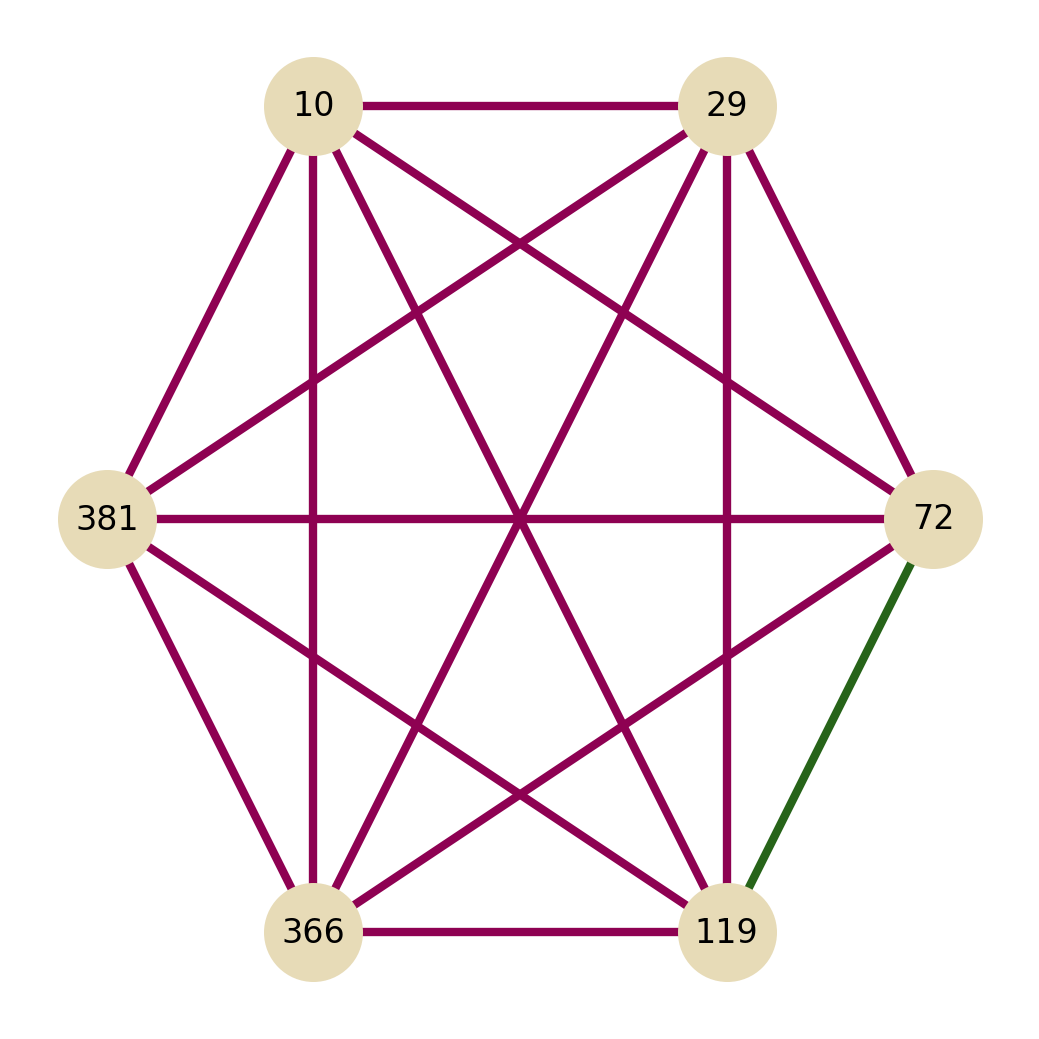

In [384]:
CMAP = plt.get_cmap("PiYG")

BSA_BONDS = [
    (b - 1, e - 1)
    for b, e in [
        (53, 62),
        (75, 91),
        (90, 101),
        (123, 168),
        (167, 176),
        (199, 245),
        (244, 252),
        (264, 278),
        (277, 288),
        (315, 360),
        (359, 368),
        (391, 437),
        (436, 447),
        (460, 476),
        (475, 486),
        (513, 558),
        (557, 566),
    ]
]

LYS_BONDS = [(5, 126), (29, 114), (63, 79), (75, 93)]

LIP_BONDS = [(56, 295), (67, 70), (262, 271)]

OVA_BONDS = [(72, 119)]

# IDEAL GRAPH
g = nx.complete_graph(reversed(cysteines[3:] + cysteines[:3]))
plt.figure(figsize=(5, 5), dpi=200)

edges = [tuple(sorted(e)) for e in g.edges()]
scores = [e in OVA_BONDS for e in edges]
scores_normalized = [
    abs(s - min(scores)) / abs(max(scores) - min(scores)) for s in scores
]
colors = [CMAP(s) for s in scores_normalized]

nx.draw_circular(
    g,
    with_labels=True,
    node_size=1200,
    node_color="#E7DBB7",
    edge_color=colors,
    width=3,
)

In [394]:
nodes = list(reversed(cysteines[3:] + cysteines[:3]))
g = nx.complete_graph(nodes)
plt.figure(figsize=(5, 5), dpi=200)


def intersects(t1, t2):
    return t1[0] in t2 or t1[1] in t2


def odds(e, positive, alkylation):
    # alkylated = alkylation[e[0]] + alkylation[e[1]]
    # if positive[e] > alkylated:
    #     return positive[e] / (alkylated + 0.1)
    # else:
    #     return -alkylated / (positive[e] + 0.1)
    return positive[e]


edges = [tuple(sorted(e)) for e in g.edges()]
scores = [
    (
        e,
        positive_evidence[e] - negative_evidence[e],
    )
    for e in edges
]


def normalize(x, xs):
    return abs(x - min(xs)) / abs(max(xs) - min(xs))


scores_normalized = [
    normalize(
        s,
        [n for f, n in scores],
    )
    for e, s in scores
]
edge_colors = [CMAP(s) for s in scores_normalized]

node_scores = [(alkylation_score[n]) for n in nodes]
node_scores_normalized = [
    abs(s - min(positive_evidence.values()))
    / abs(max(positive_evidence.values()) - min(positive_evidence.values()))
    for s in node_scores
]
node_colors = [CMAP(s) for s in node_scores_normalized]


nx.draw_circular(
    g,
    with_labels=True,
    node_size=1200,
    node_color="#E7DBB7",
    linewidths=3,
    edgecolors=node_colors,
    edge_color=edge_colors,
    width=3,
)

# nodes = list(reversed(cysteines[3:] + cysteines[:3]))
# g = nx.complete_graph(nodes)
# plt.figure(figsize=(5, 5), dpi=200)
#
# edges = [tuple(sorted(e)) for e in g.edges()]
# scores = [(positive_evidence[e]) - negative_evidence[e] for e in edges]
# scores_normalized = [
#     abs(s - min(scores)) / abs(max(scores) - min(scores)) for s in scores
# ]
# edge_colors = [CMAP(s) for s in scores_normalized]
#
# node_scores = [(alkylation_score[n]) * 0.5 for n in nodes]
# node_scores_normalized = [
#     abs(s - min(positive_evidence.values()))
#     / abs(max(positive_evidence.values()) - min(positive_evidence.values()))
#     for s in node_scores
# ]
# node_colors = [CMAP(s) for s in node_scores_normalized]
#
#
# nx.draw_circular(
#     g,
#     with_labels=True,
#     node_size=1200,
#     node_color="#E7DBB7",
#     linewidths=3,
#     edgecolors=node_colors,
#     edge_color=edge_colors,
#     width=3,
# )

ZeroDivisionError: division by zero

<Figure size 1000x1000 with 0 Axes>